# Word Embedding

Based on https://github.com/fastai/courses/blob/master/deeplearning1/nbs/wordvectors.ipynb

With **word embedding** we exchange each word (e.g. "cat") with a vector (e.g. (0.2, 0.87, ..., 0.01)) 

But from where comes this vector?

In the last exercise (2_IMDB_Sentiment_Classification) we let this embedding be learned by the neural network for this dataset. However, normally it is better to use an already pretrained word vector that was learned on a very big data set. 

The two most common word vectors are 

* word2vec (from Google) https://www.tensorflow.org/tutorials/word2vec and
* GloVe (from Stanford) https://nlp.stanford.edu/projects/glove/

More sources: 

* http://colah.github.io/posts/2014-07-NLP-RNNs-Representations/
* http://multithreaded.stitchfix.com/blog/2015/03/11/word-is-worth-a-thousand-vectors/ 
* https://arxiv.org/abs/1411.2738
* https://radimrehurek.com/gensim/models/word2vec.html

# Download GloVe

**This is only necessary once!!**

In [1]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2017-05-29 14:29:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2017-05-29 14:29:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  8.10MB/s    in 2m 4s   

2017-05-29 14:31:17 (6.65 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [5]:
%ls -lh

total 3.0G
-rw-rw-r-- 1 causeminer causeminer  59M May 26 18:27 300features_40minwords_10context
-rw-rw-r-- 1 causeminer causeminer 658K May 29 14:15 advanced-text-analysis.ipynb
drwxrwxr-x 2 causeminer causeminer 4.0K May 26 18:19 data/
-rw-rw-r-- 1 causeminer causeminer 332M Aug  4  2014 glove.6B.100d.txt
-rw-rw-r-- 1 causeminer causeminer 662M Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 causeminer causeminer 990M Aug 27  2014 glove.6B.300d.txt
-rw-rw-r-- 1 causeminer causeminer 164M Aug  4  2014 glove.6B.50d.txt
-rw-rw-r-- 1 causeminer causeminer 823M Oct 25  2015 glove.6B.zip
-rw-rw-r-- 1 causeminer causeminer  64K May 29 14:04 grail.txt
-rw-rw-r-- 1 causeminer causeminer 1.3M May 26 15:40 IMDB Keras Sentiment Classification.ipynb
-rw-rw-r-- 1 causeminer causeminer  44K May 26 16:05 labeledTrainData.tsv
-rw-rw-r-- 1 causeminer causeminer  44K May 26 16:07 labeledTrainData.tsv.1
-rw-rw-r-- 1 causeminer causeminer  44K May 26 16:05 labeledTrainData.tsv?dl=0
-rw-rw-r-- 1 causeminer ca

In [4]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [3]:
%mkdir glove_results

In [4]:
%ls

300features_40minwords_10context           my IMDB experiments.ipynb
3_word_embedding_glove.ipynb               pima-indians-diabetes.csv
advanced-text-analysis.ipynb               Pima_Indians_Diabetes.ipynb
data/                                      pride.txt
glove.6B.100d.txt                          __pycache__/
glove.6B.200d.txt                          sent2tree.py
glove.6B.300d.txt                          text8
glove.6B.50d.txt                           text8.model
glove.6B.zip                               text8.model.syn1neg.npy
glove_results/                             text8.model.wv.syn0.npy
grail.txt                                  text8.zip
IMDB Keras Sentiment Classification.ipynb  text.model.bin
IMDB with Word Embedding.ipynb             Untitled1.ipynb
labeledTrainData.tsv                       Untitled.ipynb
labeledTrainData.tsv.1                     word2vec gensim.ipynb
labeledTrainData.tsv?dl=0                  word_embedding_glove.ipynb
LSTM Sentiment Classifica

# Import Python Packages

In [23]:
from __future__ import division, print_function

import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re

import sys
import os

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import bcolz

# Preprocessing of the GloVe Data Set

** Needs to be done only once!**

In [24]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

In [25]:
def load_array(fname):
    return bcolz.open(fname)[:]

In [26]:
path = ''
res_path = path+'glove_results/'

In [12]:
def get_glove(name):
    with open(path+ 'glove.' + name + '.txt', 'r') as f: lines = [line.split() for line in f]
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

In [32]:
get_glove('6B.50d')
# get_glove('6B.100d')
# get_glove('6B.200d')
# get_glove('6B.300d')

# Loading Prepocessed GloVe Data Set

In [27]:
def load_glove(loc):
    return (load_array(loc+'.dat'),
        pickle.load(open(loc+'_words.pkl','rb')),
        pickle.load(open(loc+'_idx.pkl','rb')))

In [28]:
vecs, words, wordidx = load_glove(res_path+'6B.50d')
vecs.shape

(400000, 50)

In [29]:
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

In [19]:
def w2v(w): return vecs[wordidx[w]]

In [20]:
w2v('of')

array([ 0.70853001,  0.57088   , -0.4716    ,  0.18048   ,  0.54448998,
        0.72602999,  0.18156999, -0.52393001,  0.10381   , -0.17566   ,
        0.078852  , -0.36216   , -0.11829   , -0.83336002,  0.11917   ,
       -0.16605   ,  0.061555  , -0.012719  , -0.56623   ,  0.013616  ,
        0.22851001, -0.14396   , -0.067549  , -0.38157001, -0.23698001,
       -1.70369995, -0.86691999, -0.26704001, -0.25889999,  0.1767    ,
        3.86759996, -0.1613    , -0.13273001, -0.68880999,  0.18444   ,
        0.0052464 , -0.33873999, -0.078956  ,  0.24185   ,  0.36576   ,
       -0.34727001,  0.28483   ,  0.075693  , -0.062178  , -0.38988   ,
        0.22902   , -0.21617   , -0.22562   , -0.093918  , -0.80374998], dtype=float32)

# Visualization of GloVe with T-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimension reduction algorithm (similar to PCA). It is particularly good for the visualization of high-dimensional datasets. 

* https://lvdmaaten.github.io/tsne/
* http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* http://distill.pub/2016/misread-tsne/

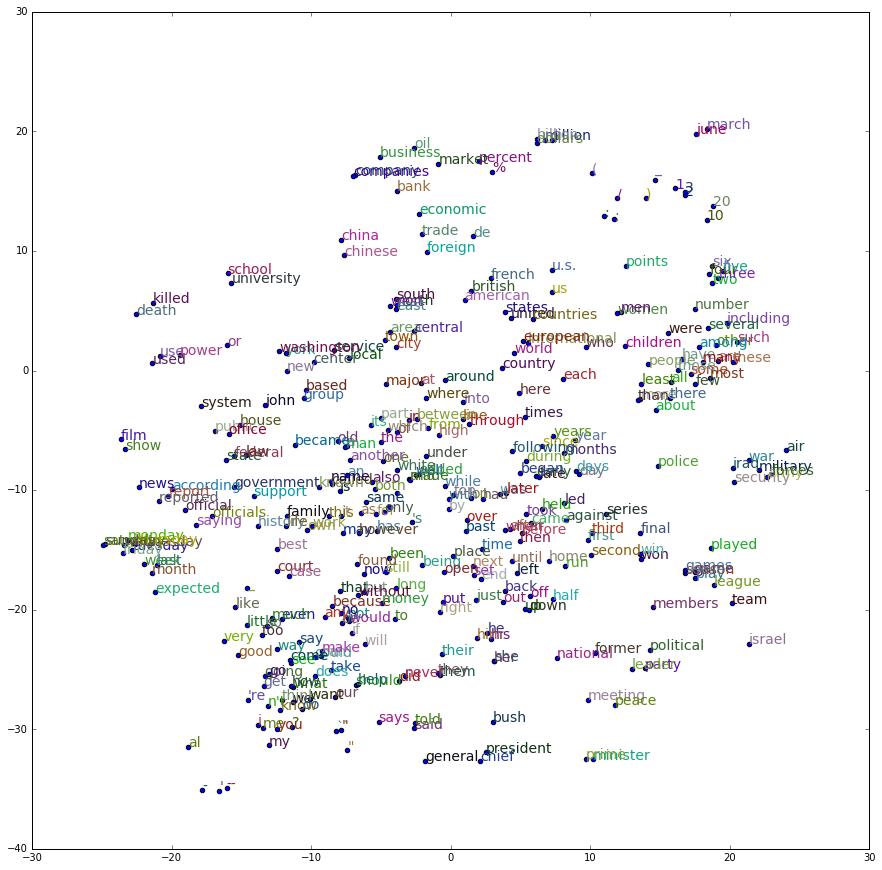

In [22]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=0; end=350
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()

# Next Step

The next step would be to use the GloVe Embedding for the classification (so that we do not learn the embedding by ourselfs). Next time...